# 인과관계를 고려한 인과분석

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 출력 옵션
pd.set_option('display.max_columns',None)

file_path ='/content/drive/MyDrive/finalzerobase/telco_preprocessed.csv'

df=pd.read_csv(file_path)
df.head()

,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,churn_rate,CLTV,Age,Married,Number of Referrals,Avg Monthly GB Download,Streaming Music,Unlimited Data,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Satisfaction Score
0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,108.15,1,3239,37,0,0,21,0,1,0.0,0,20.94,1
1,0,2,1,0,1,0,0,0,0,0,0,0,1,2,151.65,1,2701,19,0,0,51,0,1,0.0,0,18.24,2
2,0,8,1,1,1,0,0,1,0,1,1,0,1,2,820.50,1,5372,31,0,0,26,1,1,0.0,0,97.20,3
3,0,28,1,1,1,0,0,1,1,1,1,0,1,2,3046.05,1,5003,23,1,0,47,1,1,0.0,0,136.92,3
4,0,49,1,1,1,0,1,1,0,1,1,0,1,0,5036.30,1,5340,38,0,0,11,1,1,0.0,0,2172.17,1


In [ ]:
df = df.rename(columns={
    'Total Extra Data Charges': 'TotalExtraDataCharges',
    'Total Long Distance Charges': 'TotalLongDistanceCharges',
    'Number of Referrals':'NumberofReferrals',
    'Avg Monthly GB Download':'AvgMonthlyGBDownload'
})

df.columns

Index(['Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'churn_rate',
       'CLTV', 'Age', 'Married', 'NumberofReferrals', 'AvgMonthlyGBDownload',
       'Streaming Music', 'Unlimited Data', 'Total Refunds',
       'TotalExtraDataCharges', 'TotalLongDistanceCharges',
       'Satisfaction Score'],
      dtype='object')

In [ ]:
df.drop(columns='Satisfaction Score',inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Dependents                7043 non-null   int64  
 1   tenure                    7043 non-null   int64  
 2   PhoneService              7043 non-null   int64  
 3   MultipleLines             7043 non-null   int64  
 4   InternetService           7043 non-null   int64  
 5   OnlineSecurity            7043 non-null   int64  
 6   OnlineBackup              7043 non-null   int64  
 7   DeviceProtection          7043 non-null   int64  
 8   TechSupport               7043 non-null   int64  
 9   StreamingTV               7043 non-null   int64  
 10  StreamingMovies           7043 non-null   int64  
 11  Contract                  7043 non-null   int64  
 12  PaperlessBilling          7043 non-null   int64  
 13  PaymentMethod             7043 non-null   int64  
 14  TotalCha

# 컬럼 선정

feature importances 가 높은 순으로 변수를 선정하였다.  
집안구성원들이 같은 통신사를 이용하여 혜택을 받는 요금제인 가족결합요금제가 이탈 방지에 영향이 있는지 확인하고자 함.
- 가설: Dependents 여부가 이탈에 영향을 준다.


In [ ]:
df=df[["tenure", "Contract",  "InternetService", "churn_rate","Age", "TotalCharges","PaymentMethod", "OnlineSecurity","Dependents", "Married"]]

# 인과그래프

컬럼과의 관계를 보여주기 위한 DAG

In [ ]:
#!pip install dowhy

/usr/local/lib/python3.10/dist-packages/dowhy/causal_model.py:582: UserWarning: 4 variables are assumed unobserved because they are not in the dataset. Configure the logging level to `logging.WARNING` or higher for additional details.
  warnings.warn(


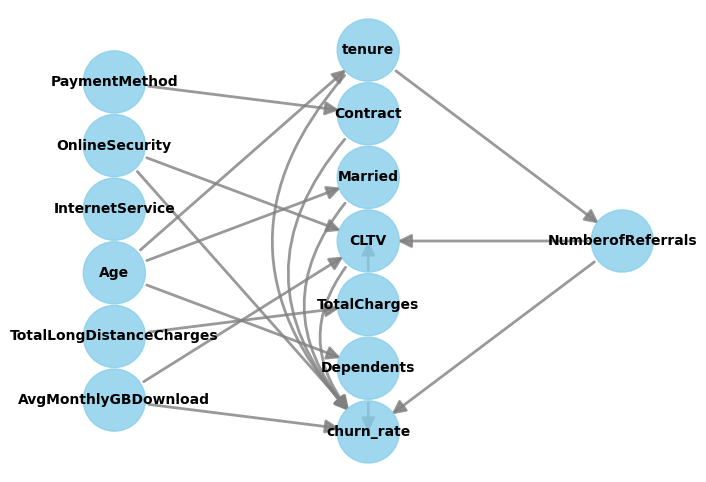

In [ ]:
from dowhy import CausalModel
gml_graph = f"""
graph [directed 1
    node [id "Dependents" label "Dependents"]
    node [id "tenure" label "tenure"]
    node [id "Contract" label "Contract"]
    node [id "NumberofReferrals" label "NumberofReferrals"]
    node [id "PaymentMethod" label "PaymentMethod"]
    node [id "InternetService" label "InternetService"]
    node [id "churn_rate" label "churn_rate"]
    node [id "Age" label "Age"]
    node [id "CLTV" label "CLTV"]
    node [id "TotalCharges" label "TotalCharges"]
    node [id "AvgMonthlyGBDownload" label "AvgMonthlyGBDownload"]
    node [id "TotalLongDistanceCharges" label "TotalLongDistanceCharges"]
    node [id "OnlineSecurity" label "OnlineSecurity"]
    node [id "Married" label "Married"]

    edge [source "Age" target "tenure"]
    edge [source "Age" target "Married"]
    edge [source "Age" target "Dependents"]
    edge [source "tenure" target "NumberofReferrals"]
    edge [source "NumberofReferrals" target "churn_rate"]
    edge [source "tenure" target "churn_rate"]
    edge [source "Married" target "churn_rate"]
    edge [source "Dependents" target "churn_rate"]
    edge [source "OnlineSecurity" target "churn_rate"]
    edge [source "OnlineSecurity" target "CLTV"]
    edge [source "TotalLongDistanceCharges" target "TotalCharges"]
    edge [source "TotalCharges" target "CLTV"]
    edge [source "CLTV" target "churn_rate"]
    edge [source "AvgMonthlyGBDownload" target "CLTV"]
    edge [source "NumberofReferrals" target "CLTV"]
    edge [source "PaymentMethod" target "Contract"]
    edge [source "Contract" target "churn_rate"]
    edge [source "AvgMonthlyGBDownload" target "churn_rate"]
]
"""

# Create the causal model
model = CausalModel(
    data=df,
    treatment='Dependents',
    outcome='Churn',
    graph=gml_graph
)

# Visualize the causal model
model.view_model()

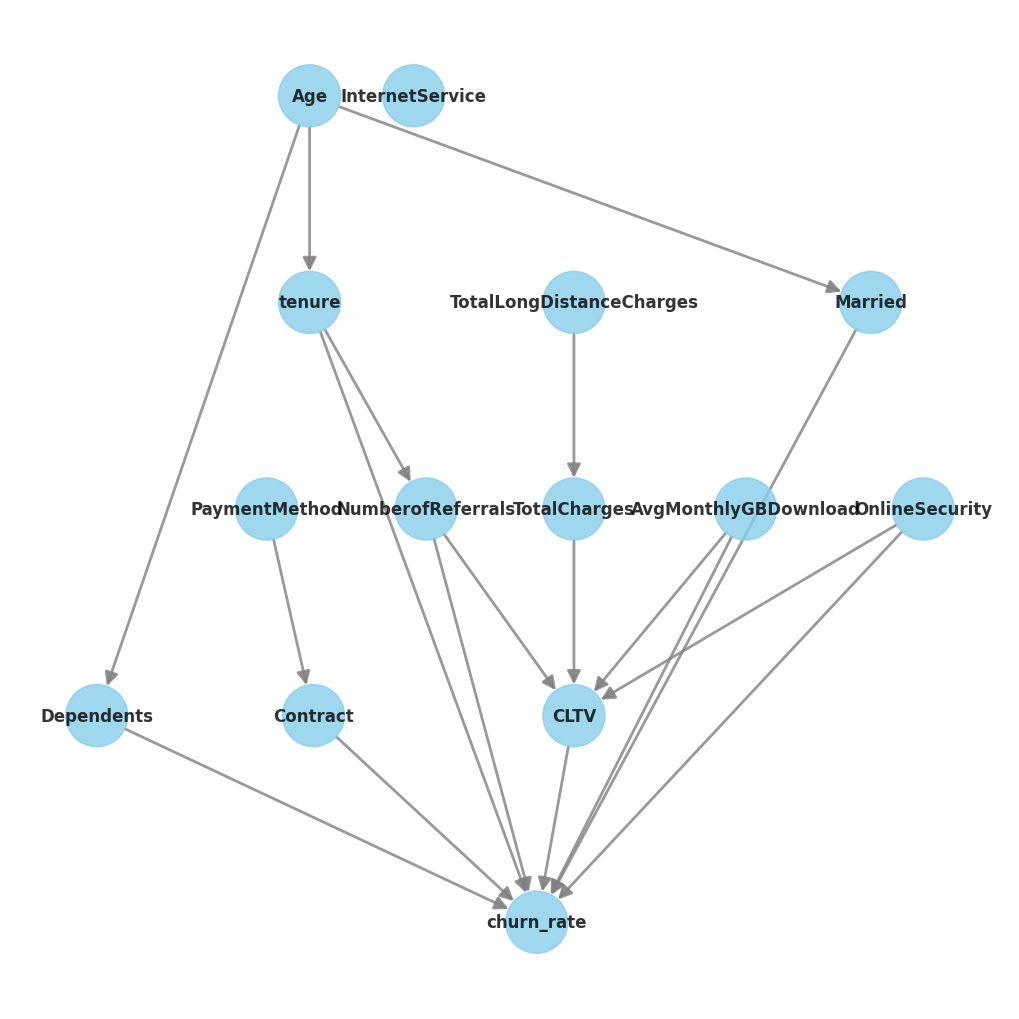

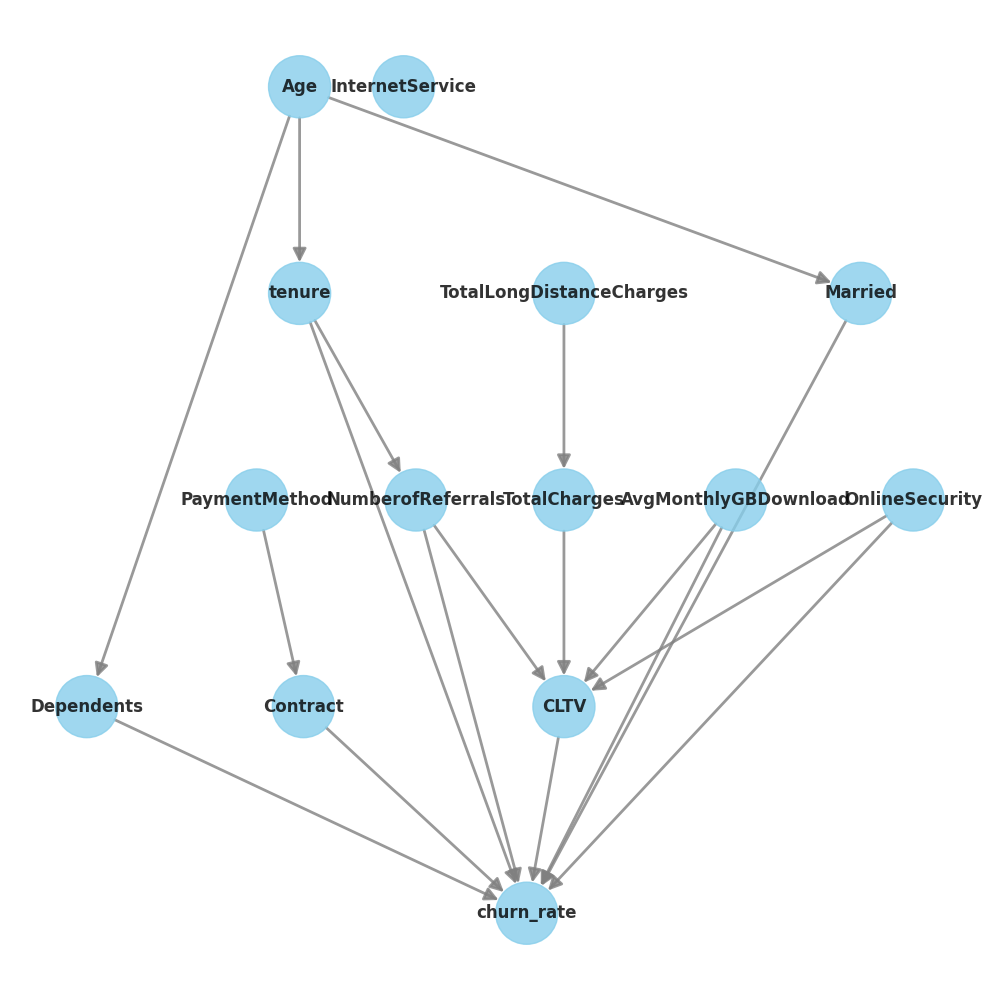

In [ ]:
from IPython.display import Image, display

# Save the causal graph as a PNG with a larger size
model.view_model(layout="dot", size=(10, 10))

# Optionally, you can display the image directly in the notebook with a larger size
display(Image(filename="causal_model.png"))


# 카이제곱 검정

Dependents 와 다른 변수와의 관계가 있는지 확인하였다.  
TotalCharges를 제외하고 는 p-value 값이 0.05보다 낮으므로 Dependents와 각 변수들과의 관계가 있음을 확인하였다.

In [ ]:
df_control=df[df.Dependents==0]
df_의존=df[df.Dependents==1]

# 카이제곱을 위한 crosstab
from scipy.stats import chi2_contingency

# Dependents + tenure
contingency = pd.crosstab(df['Dependents'], df['tenure'])

# 카이제곱 검정 수행
chi2, p, _, _ = chi2_contingency(contingency)

# 결과 출력
print(f"chi 스퀘어 값: {chi2}")
print(f"p-value (0.05): {p}")
# chi 스퀘어 값: 285.2102765430112
# p-value (0.05): 3.705920641986293e-27

chi 스퀘어 값: 285.2102765430112
p-value (0.05): 3.705920641986293e-27


In [ ]:
df_control=df[df.Dependents==0]
df_의존=df[df.Dependents==1]

# 카이제곱을 위한 crosstab
from scipy.stats import chi2_contingency

# Dependents + tenure
contingency = pd.crosstab(df['Dependents'], df['Contract'])

# 카이제곱 검정 수행
chi2, p, _, _ = chi2_contingency(contingency)

# 결과 출력
print(f"chi 스퀘어 값: {chi2}")
print(f"p-value (0.05): {p}")


chi 스퀘어 값: 420.0418172723388
p-value (0.05): 6.152877873541984e-92


In [ ]:
df_control=df[df.Dependents==0]
df_의존=df[df.Dependents==1]

# 카이제곱을 위한 crosstab
from scipy.stats import chi2_contingency

# Dependents + tenure
contingency = pd.crosstab(df['Dependents'], df['InternetService'])

# 카이제곱 검정 수행
chi2, p, _, _ = chi2_contingency(contingency)

# 결과 출력
print(f"chi 스퀘어 값: {chi2}")
print(f"p-value (0.05): {p}")


chi 스퀘어 값: 228.87130468239408
p-value (0.05): 2.0009104630634743e-50


In [ ]:
df_control=df[df.Dependents==0]
df_의존=df[df.Dependents==1]

# 카이제곱을 위한 crosstab
from scipy.stats import chi2_contingency

# Dependents + tenure
contingency = pd.crosstab(df['Dependents'], df['Age'])

# 카이제곱 검정 수행
chi2, p, _, _ = chi2_contingency(contingency)

# 결과 출력
print(f"chi 스퀘어 값: {chi2}")
print(f"p-value (0.05): {p}")


chi 스퀘어 값: 372.7743193233667
p-value (0.05): 2.6386565920884894e-46


In [ ]:
df_control=df[df.Dependents==0]
df_의존=df[df.Dependents==1]

# 카이제곱을 위한 crosstab
from scipy.stats import chi2_contingency

# Dependents + tenure
contingency = pd.crosstab(df['Dependents'], df['TotalCharges'])

# 카이제곱 검정 수행
chi2, p, _, _ = chi2_contingency(contingency)

# 결과 출력
print(f"chi 스퀘어 값: {chi2}")
print(f"p-value (0.05): {p}")

chi 스퀘어 값: 6616.331102639236
p-value (0.05): 0.22423862103439815


In [ ]:
df_control=df[df.Dependents==0]
df_의존=df[df.Dependents==1]

# 카이제곱을 위한 crosstab
from scipy.stats import chi2_contingency

# Dependents + tenure
contingency = pd.crosstab(df['Dependents'], df['PaymentMethod'])

# 카이제곱 검정 수행
chi2, p, _, _ = chi2_contingency(contingency)

# 결과 출력
print(f"chi 스퀘어 값: {chi2}")
print(f"p-value (0.05): {p}")

chi 스퀘어 값: 160.04363077239782
p-value (0.05): 1.7935563214873815e-34


In [ ]:
df_control=df[df.Dependents==0]
df_의존=df[df.Dependents==1]

# 카이제곱을 위한 crosstab
from scipy.stats import chi2_contingency

# Dependents + tenure
contingency = pd.crosstab(df['Dependents'], df['OnlineSecurity'])

# 카이제곱 검정 수행
chi2, p, _, _ = chi2_contingency(contingency)

# 결과 출력
print(f"chi 스퀘어 값: {chi2}")
print(f"p-value (0.05): {p}")

chi 스퀘어 값: 266.65560126918683
p-value (0.05): 1.2487396455085874e-58


In [ ]:
df_control=df[df.Dependents==0]
df_의존=df[df.Dependents==1]

# 카이제곱을 위한 crosstab
from scipy.stats import chi2_contingency

# Dependents + tenure
contingency = pd.crosstab(df['Dependents'], df['Married'])

# 카이제곱 검정 수행
chi2, p, _, _ = chi2_contingency(contingency)

# 결과 출력
print(f"chi 스퀘어 값: {chi2}")
print(f"p-value (0.05): {p}")

chi 스퀘어 값: 1441.2452212367994
p-value (0.05): 0.0


# PSM(성향 점수 매칭)

Propensity score 를 이용하여 실험군과 대조군의 점수가 비슷한 대상을 matching 하여 두 군의 분균형을 피하는 방법  
-> Dependents 여부가 이탈에 미치는 인과성(순수 효과)에 대해서 알 수 있다.

### 로지스틱회귀분석

In [ ]:
pd.set_option('display.max_rows', None)
# 더미 변수화
df['tenure_group'] = pd.cut(df['tenure'], bins=[0, 12, 24, 36, 48, 60, 72], right=False)
df['age_group'] = pd.cut(df['Age'], bins=[19, 29, 39, 49, 59, 69, 80], right=True)
df['totalcharges_group'] = pd.qcut(df['TotalCharges'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
tenure_dummies = pd.get_dummies(df['tenure_group'], prefix='tenure')
age_dummies = pd.get_dummies(df['age_group'], prefix='age')
totalcharges_dummies = pd.get_dummies(df['totalcharges_group'], prefix='TotalCharges')


payment_dummies = pd.get_dummies(df['PaymentMethod'], prefix='PaymentMethod')
Security_dummies = pd.get_dummies(df['OnlineSecurity'], prefix='OnlineSecurity')
Internet_dummies = pd.get_dummies(df['InternetService'], prefix='InternetService')
married_dummies = pd.get_dummies(df['Married'], prefix='Married')
contract_dummies = pd.get_dummies(df['Contract'], prefix='Contract')

# 더미 변수 추가
df = pd.concat([df, age_dummies], axis=1)
df = pd.concat([df, tenure_dummies], axis=1)
df = pd.concat([df, totalcharges_dummies], axis=1)

df = pd.concat([df, payment_dummies, Internet_dummies,Security_dummies, married_dummies, contract_dummies], axis=1)

# 원래 열 삭제
df.drop(['totalcharges_group'], axis=1, inplace=True)

df.drop(['age_group'], axis=1, inplace=True)
df.drop(['tenure_group'], axis=1, inplace=True)

# df.drop(['PaymentMethod', 'PaperlessBilling', 'Married', 'Contract'], axis=1, inplace=True)

#
features=df.drop(columns=['churn_rate','Dependents'])
churn=df['Dependents']

# train_test_split
from sklearn.model_selection import train_test_split
train_features, test_features,train_labels,test_labels=train_test_split(features,churn)


# 모델링
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(train_features,train_labels)

#
coefficients = pd.DataFrame({
    'Feature': train_features.columns,
    'Coefficient': model.coef_[0]
})

print(coefficients)

              Feature  Coefficient
0              tenure    -0.010450
1            Contract     0.234187
2     InternetService    -0.051553
3                 Age    -0.023705
4        TotalCharges    -0.000051
5       PaymentMethod     0.060570
6      OnlineSecurity     0.156393
7             Married     0.808114
8        age_(19, 29]    -0.140590
9        age_(29, 39]    -0.020025
10       age_(39, 49]     0.088502
11       age_(49, 59]     0.153478
12       age_(59, 69]     0.043889
13       age_(69, 80]    -0.136405
14     tenure_[0, 12)    -0.095875
15    tenure_[12, 24)     0.028160
16    tenure_[24, 36)     0.047823
17    tenure_[36, 48)     0.003175
18    tenure_[48, 60)    -0.021447
19    tenure_[60, 72)    -0.022954
20    TotalCharges_Q1    -0.028383
21    TotalCharges_Q2     0.044584
22    TotalCharges_Q3    -0.075640
23    TotalCharges_Q4     0.010410
24    PaymentMethod_0    -0.024964
25    PaymentMethod_1     0.018843
26    PaymentMethod_2    -0.170451
27    PaymentMethod_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Propensity Score

In [ ]:
# propensity score
import math

# prediction
pred_binary = model.predict(features)  # binary 0 control, 1, treatment
pred_prob = model.predict_proba(features)  # probabilities for classes

#print('the binary prediction is:', pred_binary[0])
#print('the corresponding probabilities are:', pred_prob[0])

df['ps'] = pred_prob[:, 1]

def logit(p):
    logit_value = math.log(p / (1-p))
    return logit_value

df['ps_logit'] = df.ps.apply(lambda x: logit(x))

In [ ]:
df[['ps','ps_logit']].head()

,ps,ps_logit
0,0.173579,-1.560471
1,0.109253,-2.098394
2,0.081140,-2.426959
3,0.454046,-0.184336
4,0.040185,-3.173252


In [ ]:
df.head()

,tenure,Contract,InternetService,churn_rate,Age,TotalCharges,PaymentMethod,OnlineSecurity,Dependents,Married,"age_(19, 29]","age_(29, 39]","age_(39, 49]","age_(49, 59]","age_(59, 69]","age_(69, 80]","tenure_[0, 12)","tenure_[12, 24)","tenure_[24, 36)","tenure_[36, 48)","tenure_[48, 60)","tenure_[60, 72)",TotalCharges_Q1,TotalCharges_Q2,TotalCharges_Q3,TotalCharges_Q4,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3,InternetService_0,InternetService_1,InternetService_2,OnlineSecurity_0,OnlineSecurity_1,OnlineSecurity_2,Married_0,Married_1,Contract_0,Contract_1,Contract_2,ps,ps_logit
0,2,0,0,1,37,108.15,3,1,0,0,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,True,False,True,False,True,False,False,0.173579,-1.560471
1,2,0,1,1,19,151.65,2,0,0,0,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,True,False,False,True,False,True,False,False,0.109253,-2.098394
2,8,0,1,1,31,820.50,2,0,0,0,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,True,False,False,True,False,True,False,False,0.081140,-2.426959
3,28,0,1,1,23,3046.05,2,0,0,1,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,True,False,True,False,False,False,True,True,False,False,0.454046,-0.184336
4,49,0,1,1,38,5036.30,0,0,0,0,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,True,False,True,False,False,True,False,True,False,False,0.040185,-3.173252


### 분포 확인

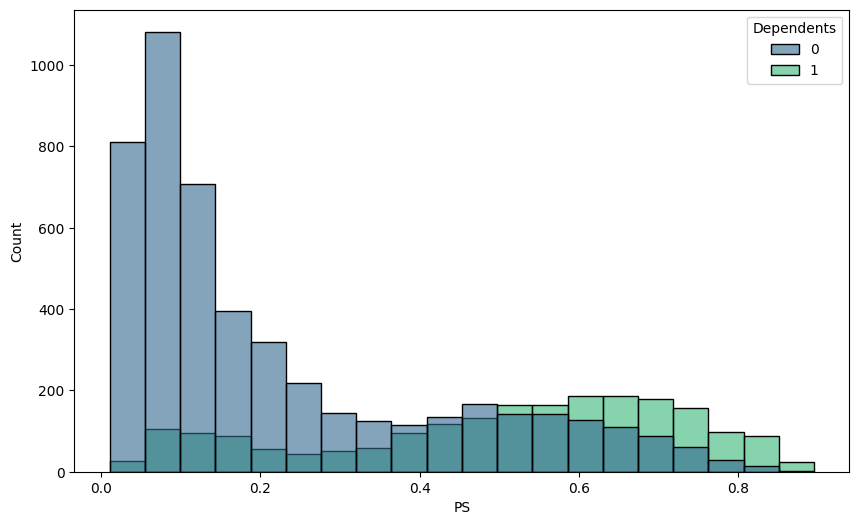

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(x='ps', hue='Dependents', data=df,palette='viridis',alpha=0.6)
plt.xlabel('PS')
plt.ylabel('Count')
plt.show()

### knn 기반 인덱스 매칭

In [ ]:
# (knn 기반 Dependents 집단에 따른 인덱스 매칭)

# use 25% of standard deviation of the propensity score as the caliper/radius
# get the k closest neighbors for each observations
# relax caliper and increase k can provide more matches

from sklearn.neighbors import NearestNeighbors

caliper = np.std(df.ps) * 0.25
print(f'caliper (radius) is: {caliper:.4f}')

n_neighbors = 10


# KNN
knn = NearestNeighbors(n_neighbors=n_neighbors, radius=caliper)

ps = df[['ps']]
knn.fit(ps)


# distances and indexes
distances, neighbor_indexes = knn.kneighbors(ps)

matched_control = []  # keep track of the matched observations in control
for current_index, row in df.iterrows():  # iterate over the dataframe
    if row.Dependents == 0:  # the current row is in the control group
        df.loc[current_index, 'matched'] = np.nan  # set matched to nan
    else:
        for idx in neighbor_indexes[current_index, :]: # for each row in churn, find the k neighbors
            # make sure the current row is not the idx - don't match to itself
            # and the neighbor is in the control
            if (current_index != idx) and (df.loc[idx].Dependents == 0):
                if idx not in matched_control:  # this control has not been matched yet
                    df.loc[current_index, 'matched'] = idx  # record the matching
                    matched_control.append(idx)  # add the matched to the list
                    break


# control have no match
Dependents_matched = df.dropna(subset=['matched'])  # drop not matched

# matched control observation indexes
control_matched_idx = Dependents_matched.matched
control_matched_idx = control_matched_idx.astype(int)  # change to int
control_matched = df.loc[control_matched_idx, :]  # select matched control observations

# combine the matched treatment and control
df_matched = pd.concat([Dependents_matched, control_matched])

df_matched.Dependents.value_counts()

caliper (radius) is: 0.0614


,count
Dependents,
1,1439
0,1439


knn기반 Dependents 집단에 따른 인덱스 매칭 결과,각각 1439명씩 매칭되었다.

# 카이제곱 검정

매칭 후 Dependents 변수 간 영향이 있는지 확인을 해보았다. Age를 제외하고는 p-value 가 0.05보다 크므로 귀무가설을 기각하지 못하여 Dependents와 해당 변수들과 관계가 없다고 판단된다.
이탈율을 단순비교해보아도, 매칭전에 비해 매칭 후 이탈율의 차이가 줄어든것을 확인할 수 있었다.

In [ ]:
from scipy.stats import chi2_contingency

# Dependents + tenure
contingency = pd.crosstab(df_matched['Dependents'], df_matched['tenure'])

# 카이제곱 검정 수행
chi2, p, _, _ = chi2_contingency(contingency)

# 결과 출력
print(f"chi 스퀘어 값: {chi2}")
print(f"p-value (0.05): {p}")

chi 스퀘어 값: 65.63772301155876
p-value (0.05): 0.6881639914962537


In [ ]:
from scipy.stats import chi2_contingency

# Dependents + tenure
contingency = pd.crosstab(df_matched['Dependents'], df_matched['Contract'])

# 카이제곱 검정 수행
chi2, p, _, _ = chi2_contingency(contingency)

# 결과 출력
print(f"chi 스퀘어 값: {chi2}")
print(f"p-value (0.05): {p}")

chi 스퀘어 값: 1.2729956919778467
p-value (0.05): 0.5291423207417321


In [ ]:
from scipy.stats import chi2_contingency

# Dependents + tenure
contingency = pd.crosstab(df_matched['Dependents'], df_matched['InternetService'])

# 카이제곱 검정 수행
chi2, p, _, _ = chi2_contingency(contingency)

# 결과 출력
print(f"chi 스퀘어 값: {chi2}")
print(f"p-value (0.05): {p}")

chi 스퀘어 값: 0.047758073565907264
p-value (0.05): 0.976403811560961


In [ ]:
from scipy.stats import chi2_contingency

# Dependents + tenure
contingency = pd.crosstab(df_matched['Dependents'], df_matched['Age'])

# 카이제곱 검정 수행
chi2, p, _, _ = chi2_contingency(contingency)

# 결과 출력
print(f"chi 스퀘어 값: {chi2}")
print(f"p-value (0.05): {p}")

chi 스퀘어 값: 131.3347156015327
p-value (0.05): 4.567849940601766e-07


In [ ]:
from scipy.stats import chi2_contingency

# Dependents + tenure
contingency = pd.crosstab(df_matched['Dependents'], df_matched['TotalCharges'])

# 카이제곱 검정 수행
chi2, p, _, _ = chi2_contingency(contingency)

# 결과 출력
print(f"chi 스퀘어 값: {chi2}")
print(f"p-value (0.05): {p}")

chi 스퀘어 값: 2806.0
p-value (0.05): 0.46452965188235235


In [ ]:
from scipy.stats import chi2_contingency

# Dependents + tenure
contingency = pd.crosstab(df_matched['Dependents'], df_matched['PaymentMethod'])

# 카이제곱 검정 수행
chi2, p, _, _ = chi2_contingency(contingency)

# 결과 출력
print(f"chi 스퀘어 값: {chi2}")
print(f"p-value (0.05): {p}")

chi 스퀘어 값: 1.0176665742024964
p-value (0.05): 0.7969772733503321


In [ ]:
from scipy.stats import chi2_contingency

# Dependents + tenure
contingency = pd.crosstab(df_matched['Dependents'], df_matched['OnlineSecurity'])

# 카이제곱 검정 수행
chi2, p, _, _ = chi2_contingency(contingency)

# 결과 출력
print(f"chi 스퀘어 값: {chi2}")
print(f"p-value (0.05): {p}")

chi 스퀘어 값: 2.9377052250513085
p-value (0.05): 0.23018945021458417


In [ ]:
from scipy.stats import chi2_contingency

# Dependents + tenure
contingency = pd.crosstab(df_matched['Dependents'], df_matched['Married'])

# 카이제곱 검정 수행
chi2, p, _, _ = chi2_contingency(contingency)

# 결과 출력
print(f"chi 스퀘어 값: {chi2}")
print(f"p-value (0.05): {p}")

chi 스퀘어 값: 0.22289343246592316
p-value (0.05): 0.6368440568568954


##### 이탈율 단순 비교

In [ ]:
churn_rate_percentage = df_matched.groupby('Dependents')['churn_rate'].value_counts(normalize=True).unstack()
churn_rate_percentage.loc[:, 1] * 100


,1
Dependents,
0,21.681723
1,22.376650


매칭전 Dependents ==1인 경우 이탈율:15.45%
매칭전 Dependents ==0 인 경우 이탈율:31.27%

매칭 후 Dependents ==1인 경우 이탈율:22.37%
매칭 후 Dependents ==0인 경우 이탈율:21.68%
=> 이탈율의 차이가 줄어들었다.

# 로지스틱회귀분석

다른 변수와의 관계성을 끊은 후, 최종적으로 설명변수를 Dependents로 종속변수를 churn_rate로 하여 로지스틱 회귀분석을 진행하였다.
이를 통해, Dependents 여부에 따라 이탈 확률이 1.04배 증가한다는 사실을 얻을 수 있었다.

In [ ]:
# 로지스틱회귀분석
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

features = df_matched[['Dependents']]

features = pd.get_dummies(features, drop_first=True)
churn = df_matched['churn_rate']

train_features, test_features, train_labels, test_labels = train_test_split(features, churn,
                                                                           test_size=0.3,
                                                                           random_state=2)
model = LogisticRegression()
model.fit(train_features, train_labels)

features2 = sm.add_constant(features) # 상수항 추가
logit = sm.Logit(churn,features2)
result = logit.fit()

result.summary2()

Optimization terminated successfully.
         Current function value: 0.527242
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            Method:           MLE      
Dependent Variable: churn_rate       Pseudo R-squared: 0.000    
Date:               2024-08-14 15:57 AIC:              3038.8048
No. Observations:   2878             BIC:              3050.7345
Df Model:           1                Log-Likelihood:   -1517.4  
Df Residuals:       2876             LL-Null:          -1517.5  
Converged:          1.0000           LLR p-value:      0.65287  
No. Iterations:     5.0000           Scale:            1.0000   
-----------------------------------------------------------------
             Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-----------------------------------------------------------------
const       -1.2843    0.0640  -20.0761  0.0000  -1.4097  -1.1589
Dependents   0.0405    0.0900    0.4498  0.6529  -0.1359   0.2168
================================================================

"""

In [ ]:
np.exp(result.params)

,0
const,0.276841
Dependents,1.041291


하지만, 그대로 해석해서는 안된다.  p-value가 0.65287로 0.05보다 작지 않아 귀무가설을 기각할 수 없다.
따라서, Dependents 여부는 이탈에 유의하지 않다.